## 모듈/패키지 import

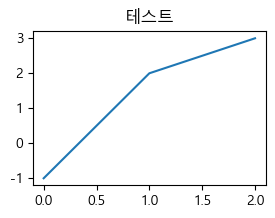

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(4,3))

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


## melt
* 넓은 형식을 긴 형식으로 변환
    * 여러 열로 나뉜 값들을 하나의 열로 보낸다.
    * seaborn 시각화 도구는 long format을 선호한다.
* `데이터프레임.melt()`
* `pd.melt(데이터프레임)`
>* 주요 파라미터
>   * `id_vars` : 유지할 열(기준 열)
>   * `value_vars` : 긴 형식으로 변환할 열
>   * `var_name` : 변수명을 저장할 새 열이 이름 (default : variable)
>   * `value_name` : 값을 저장할 새 열의 이름 (default:value)


In [2]:
df = pd.read_csv('data/scores.csv', dtype={'학번':'str'})\
                    .fillna(0)\
                    .astype({'국어':'int','수학':'int'})

In [3]:
df

,학번,이름,성별,국어,영어,수학
0,0001,kate,f,100,90,95
1,0002,olivia,f,90,80,75
2,0003,emma,f,95,100,100
3,0004,sophia,f,100,100,100
4,0005,amy,f,0,35,60
5,0006,james,m,70,75,65
6,0007,daniel,m,80,90,55
7,0008,peter,m,50,60,0
8,0009,kevin,m,100,100,90
9,0010,jack,m,90,95,70


In [8]:
df_melt = df.melt(id_vars=['학번','이름','성별'],
        value_vars=['국어','영어','수학'],
        var_name='과목',
        value_name='점수')
df_melt

,학번,이름,성별,과목,점수
0,0001,kate,f,국어,100
1,0002,olivia,f,국어,90
2,0003,emma,f,국어,95
3,0004,sophia,f,국어,100
4,0005,amy,f,국어,0
5,0006,james,m,국어,70
6,0007,daniel,m,국어,80
7,0008,peter,m,국어,50
8,0009,kevin,m,국어,100
9,0010,jack,m,국어,90


* 국어 점수를 seaborn으로 시각화

In [9]:
df

,학번,이름,성별,국어,영어,수학
0,0001,kate,f,100,90,95
1,0002,olivia,f,90,80,75
2,0003,emma,f,95,100,100
3,0004,sophia,f,100,100,100
4,0005,amy,f,0,35,60
5,0006,james,m,70,75,65
6,0007,daniel,m,80,90,55
7,0008,peter,m,50,60,0
8,0009,kevin,m,100,100,90
9,0010,jack,m,90,95,70


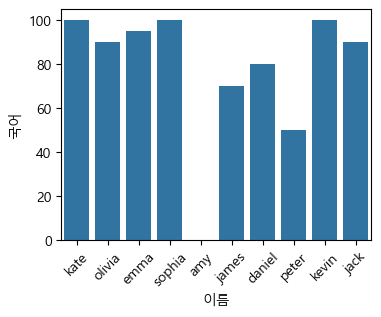

In [10]:
sns.barplot(data=df, x='이름', y='국어')
plt.xticks(rotation=45);

* 국어, 영어, 수학 점수를 seaborn으로 시각화

In [96]:
# ------------------
# melt
# ------------------
df_melt = df.melt(id_vars = ['학번','이름','성별'],
        value_vars = ['국어','영어','수학'],
        var_name = '과목',
        value_name = '점수')

In [11]:
df_melt

,학번,이름,성별,과목,점수
0,0001,kate,f,국어,100
1,0002,olivia,f,국어,90
2,0003,emma,f,국어,95
3,0004,sophia,f,국어,100
4,0005,amy,f,국어,0
5,0006,james,m,국어,70
6,0007,daniel,m,국어,80
7,0008,peter,m,국어,50
8,0009,kevin,m,국어,100
9,0010,jack,m,국어,90


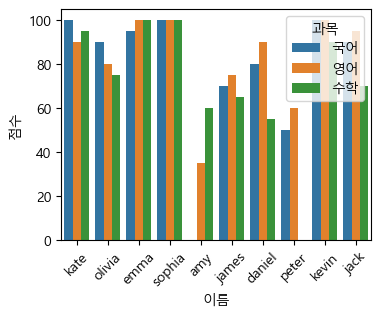

In [15]:
# ------------------
# 시각화
# ------------------
sns.barplot(data=df_melt, x='이름', y='점수', hue='과목')
plt.xticks(rotation=45);

## pivot_table

* 데이터 요약 및 집계
* `데이터프레임.pivot_table`
* `pd.pivot_taboe(데이터프레임)`
>* 주요 파라미터
>   * **`index`** : 인덱스로 사용할 컬럼(필수)
>   * **`columns`** : 컬럼으로 사용할 컬럼(필수)
>   * **`values`** : 집계할 대상 열(필수)
>   * `arrfunc` : 집계함수(default 'mean')
>   * `margins` : 총합 행/열 추가 여부


In [16]:
df_melt

,학번,이름,성별,과목,점수
0,0001,kate,f,국어,100
1,0002,olivia,f,국어,90
2,0003,emma,f,국어,95
3,0004,sophia,f,국어,100
4,0005,amy,f,국어,0
5,0006,james,m,국어,70
6,0007,daniel,m,국어,80
7,0008,peter,m,국어,50
8,0009,kevin,m,국어,100
9,0010,jack,m,국어,90


In [18]:

# ------------------------------------------
# 학번에 따른 국어, 영어, 수학 
# ------------------------------------------
df_melt.pivot_table(index=['학번','이름'],
               columns=['과목'],
               values=['점수'])

점수              
과목              국어     수학     영어
학번   이름                         
0001 kate    100.0   95.0   90.0
0002 olivia   90.0   75.0   80.0
0003 emma     95.0  100.0  100.0
0004 sophia  100.0  100.0  100.0
0005 amy       0.0   60.0   35.0
0006 james    70.0   65.0   75.0
0007 daniel   80.0   55.0   90.0
0008 peter    50.0    0.0   60.0
0009 kevin   100.0   90.0  100.0
0010 jack     90.0   70.0   95.0
0011 james    70.0   65.0   75.0

In [19]:
# ------------------------------------------
# 성별에 따른 국어, 영어, 수학 평균 집계
# ------------------------------------------
df_melt.pivot_table(index='성별',
               columns='과목',
               values='점수',
               aggfunc='mean')

과목,국어,수학,영어
성별,,,
f,77.000000,86.0,81.0
m,76.666667,57.5,82.5


In [20]:
# ---------------------
# 전체평균 표시
# ---------------------

df_melt.pivot_table(index='성별',
               columns='과목',
               values='점수',
               aggfunc='mean',
               margins=True)

과목,국어,수학,영어,All
성별,,,,
f,77.000000,86.000000,81.000000,81.333333
m,76.666667,57.500000,82.500000,72.222222
All,76.818182,70.454545,81.818182,76.363636
